# Tesla Deaths In the World

# Overall

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gp

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy() 

In [5]:
import os

# 列出当前目录中的文件
print(os.listdir())

['.ipynb_checkpoints', 'world-administrative-boundaries', 'Tesla_Dealth.csv', 'world-administrative-boundaries.cpg', 'world-administrative-boundaries.prj', 'Untitled.ipynb', 'Screenshot 2024-08-14 at 11.19.37.png', 'Tesla_Dealth_zip.zip', 'nsw_localities.zip', 'world-administrative-boundaries.dbf', 'ne_110m_admin_0_countries.shp', 'world-administrative-boundaries.shp', 'Humor-Sans.ttf', 'penalty_data_set_0.csv', 'maps.ipynb', 'ne_110m_admin_0_countries.prj', 'Tesla_Death_zip.zip', 'ne_110m_admin_0_countries.dbf', 'Tesla_Death.zip', 'world-administrative-boundaries.shx', 'basic_pandas.ipynb', 'tricks.ipynb', 'GDA94', 'Chart.py', 'ne_110m_admin_0_countries.README.html', 'world-administrative-boundaries 2', 'tricks.py', 'Tesla_Dealth.zip.zip', 'Tesla_Dealth-Copy1.csv', 'world-administrative-boundaries.zip', 'ne_110m_admin_0_countries.shx', '.DS_Store', 'ne_110m_admin_0_countries.VERSION.txt', 'ne_110m_admin_0_countries.cpg']


In [6]:
if os.path.isfile("Tesla_Dealth.csv"):
    filepath = "Tesla_Dealth.csv"
    print("loading from file")

penalty_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [7]:
penalty_data.shape

(254, 21)

In [8]:
penalty_data.columns = [ct.strip() for ct in penalty_data.columns]

## Trends (2013-2022)

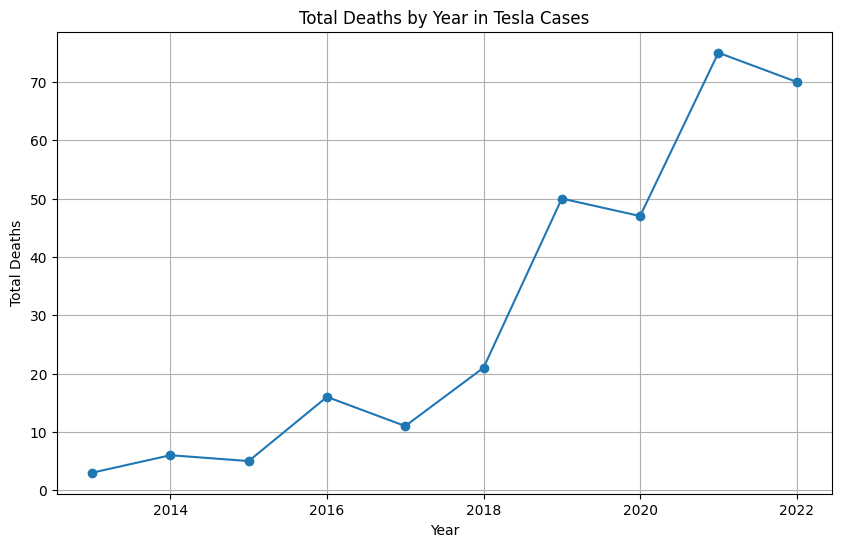

In [58]:
penalty_data['Deaths'] = pd.to_numeric(penalty_data['Deaths'], errors='coerce')
yearly_deaths = penalty_data.groupby('Year')['Deaths'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Year in Tesla Cases')
plt.grid(True)
plt.show()

## Where did the accidents happen?

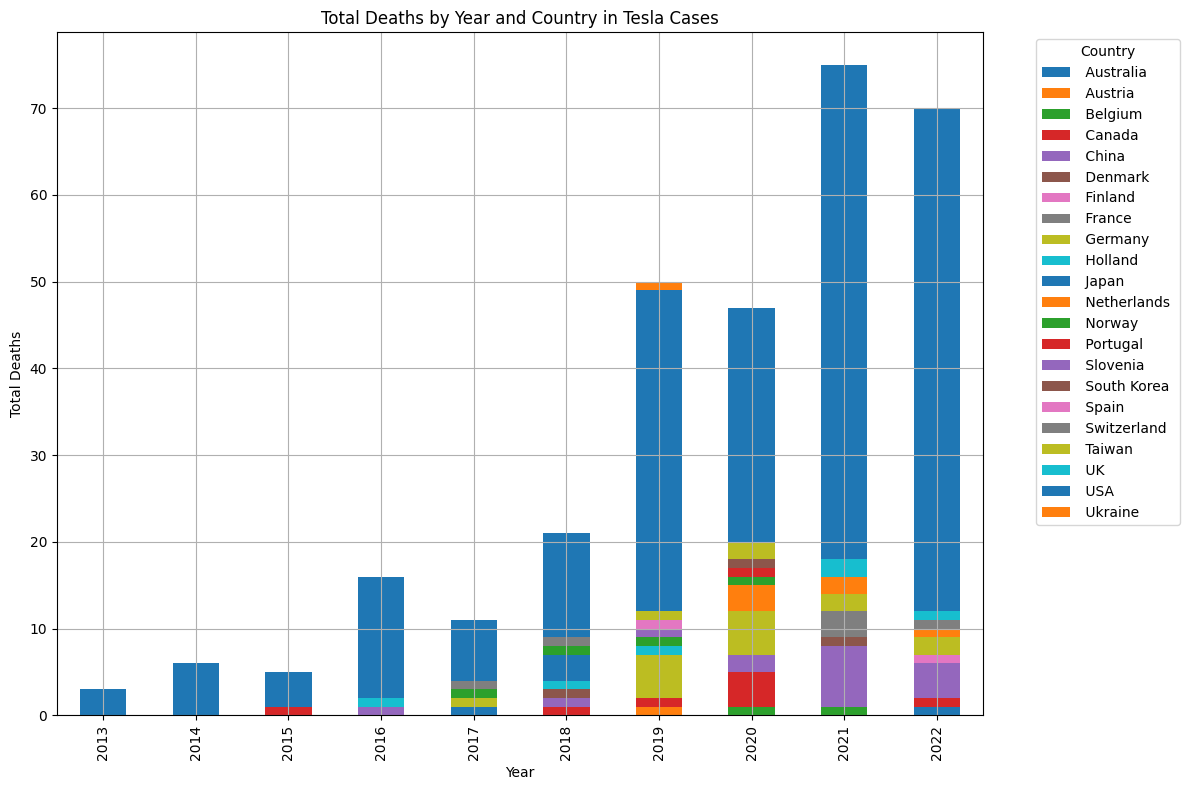

In [10]:
penalty_data.columns = penalty_data.columns.str.strip()

# Group the data by year and country, and sum the deaths for each group
yearly_country_deaths = penalty_data.groupby(['Year', 'Country'])['Deaths'].sum().unstack().fillna(0)

# Plot the data using a bar chart
yearly_country_deaths.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Year and Country in Tesla Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Top 3 Countries

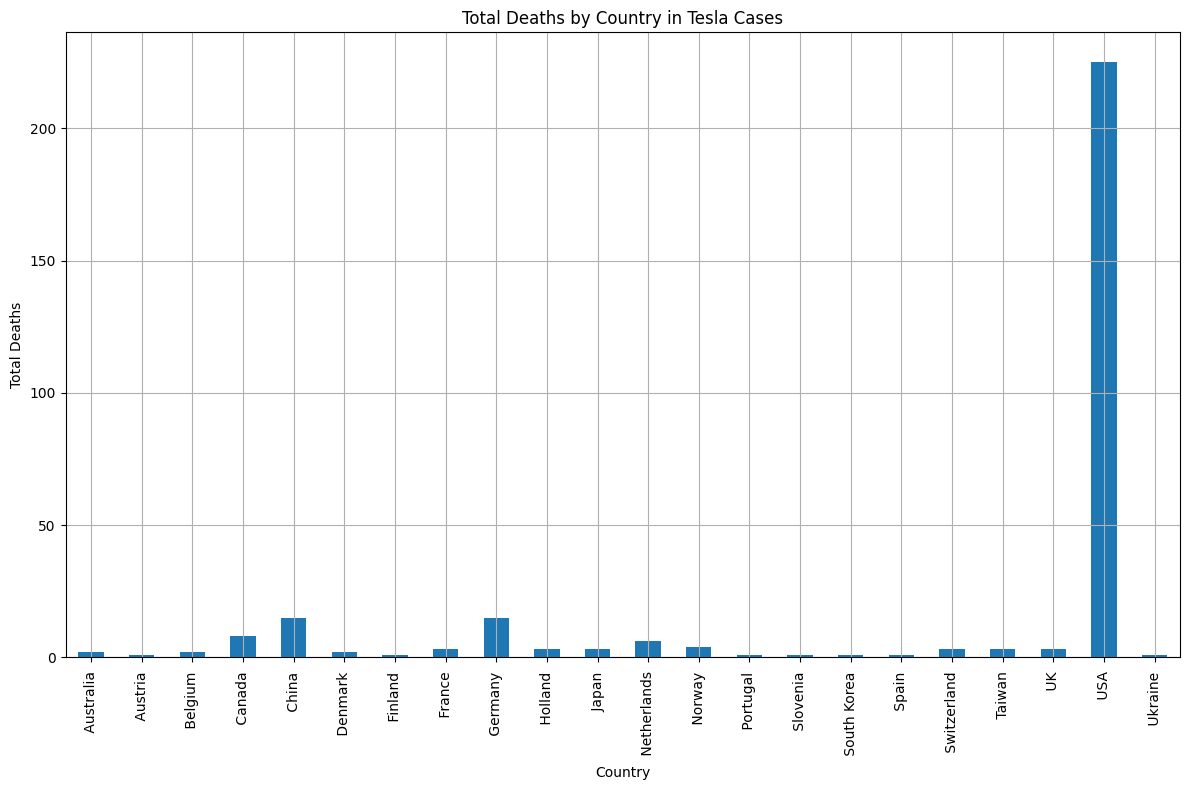

In [11]:
penalty_data.columns = penalty_data.columns.str.strip()

# Group the data by country and sum the deaths for each country
country_deaths = penalty_data.groupby('Country')['Deaths'].sum()

# Plot the data using a bar chart
plt.figure(figsize=(12, 8))
country_deaths.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Country in Tesla Cases')
plt.grid(True)
plt.tight_layout()

In [12]:
penalty_data.columns = penalty_data.columns.str.strip()

# 定义关键词分类
categories = {
    "Motorcycle/Cyclist": ["Motorcycle", "motorcycle", "bicyclist", "Motorcyclist", "motorcyclist", "cyclist"],
    "Tree": ["tree"],
    "Cliff": ["cliff"],
    "Pedestrian": ["pedestrian"],
    "Collision": ["collision"]
}

# 统计每个类别出现的次数
category_counts = {category: 0 for category in categories}

for category, keywords in categories.items():
    for keyword in keywords:
        category_counts[category] += penalty_data['Description'].str.contains(keyword, case=False, na=False).sum()

print(category_counts)

{'Motorcycle/Cyclist': np.int64(51), 'Tree': np.int64(21), 'Cliff': np.int64(5), 'Pedestrian': np.int64(23), 'Collision': np.int64(26)}


## The most common type of accidents

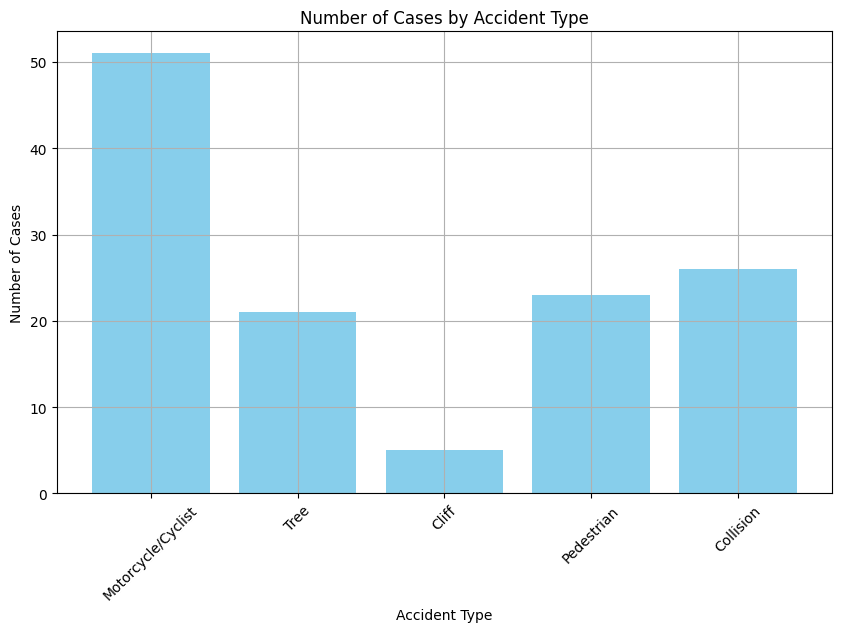

In [60]:
category_counts = {category: 0 for category in categories}

for category, keywords in categories.items():
    for keyword in keywords:
        category_counts[category] += penalty_data['Description'].str.contains(keyword, case=False, na=False).sum()
        

plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')

plt.xlabel('Accident Type')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Accident Type')
plt.xticks(rotation=45)
plt.grid(True)

In [14]:
import os
import geopandas as gp
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = r"world-administrative-boundaries.shp"
zip_file_name = "world-administrative-boundaries.zip"

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [15]:

import sys
print(sys.version)

3.10.13 (main, Jul 11 2024, 16:23:02) [GCC 9.4.0]


In [16]:
print(world.columns)

NameError: name 'world' is not defined

In [ ]:
shp_file_path = 'world-administrative-boundaries.shp'  # 确认文件名和路径正确

# 尝试读取形状文件
try:
    gdf = gp.read_file(shp_file_path)
    print("Shapefile loaded successfully.")
    print(gdf.head())
except Exception as e:
    print(f"Error loading shapefile: {e}")
    gdf = None

if gdf is not None:
    # 读取你的死亡数据
    csv_file_path = 'Tesla_Dealth.csv'  # 确保路径正确
    try:
        penalty_data = pd.read_csv(csv_file_path)
        print("CSV file loaded successfully.")
        print(penalty_data.head())
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        penalty_data = None

    if penalty_data is not None:
        # 确保数据框中包含'Country'和'Deaths'列
        if 'Country' in penalty_data.columns and 'Deaths' in penalty_data.columns:
            # 按国家分组并计算每个国家的死亡人数总和
            country_deaths = penalty_data.groupby('Country')['Deaths'].sum().reset_index()

            # 将数据框转换为GeoDataFrame
            geo_data = gdf.set_index('name').join(country_deaths.set_index('Country'))

            # 绘制地图
            fig, ax = plt.subplots(1, 1, figsize=(15, 10))
            geo_data.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

            plt.title('Number of Deaths by Country')
            plt.show()
        else:
            print("The dataframe does not contain 'Country' or 'Deaths' column.")
else:
    print("Shapefile could not be loaded.")

In [17]:
burbs = gp.read_file(shp_file_name) 
#gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
98,OMN,Member State,OMN,Oman,Asia,Western Asia,OM,Oman,"MULTIPOLYGON (((58.845 20.443, 58.824 20.413, ..."
247,ATG,Member State,ATG,Antigua & Barbuda,Americas,Caribbean,AG,Antigua-et-Barbuda,"MULTIPOLYGON (((-61.685 17.026, -61.738 16.99,..."
166,ISL,Member State,ISL,Iceland,Europe,Northern Europe,IS,Islande,"POLYGON ((-16.025 66.536, -15.957 66.511, -15...."
125,AFG,Member State,AFG,Afghanistan,Asia,Southern Asia,AF,Afghanistan,"POLYGON ((74.916 37.237, 74.809 37.224, 74.773..."
192,CHN,Member State,CHN,China,Asia,Eastern Asia,CN,Chine,"MULTIPOLYGON (((110.716 20.069, 110.779 20.01,..."
77,GEO,Member State,GEO,Georgia,Asia,Western Asia,GE,Géorgie,"POLYGON ((46.452 41.897, 46.436 41.862, 46.415..."
130,LAO,Member State,LAO,Lao People's Democratic Republic,Asia,South-Eastern Asia,LA,République démocratique populaire lao,"POLYGON ((102.141 22.396, 102.154 22.385, 102...."
214,None,US Territory,USA,Jarvis Island,Americas,Northern America,None,Jarvis Island,"POLYGON ((-160.021 -0.398, -160.028 -0.398, -1..."
5,MNG,Member State,MNG,Mongolia,Asia,Eastern Asia,MN,Mongolie,"POLYGON ((116.711 49.83, 116.647 49.738, 116.5..."
107,CIV,Member State,CIV,Côte d'Ivoire,Africa,Western Africa,CI,Côte d'Ivoire,"MULTIPOLYGON (((-3.102 5.11, -3.103 5.085, -3...."


In [18]:
burbs = gp.read_file(shp_file_name) 
#gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(10)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
85,MDG,Member State,MDG,Madagascar,Africa,Eastern Africa,MG,Madagascar,"MULTIPOLYGON (((49.834 -17.09, 49.827 -17.095,..."
156,PSE,Occupied Territory,XXX,West Bank,Asia,Western Asia,PS,État de Palestine,"POLYGON ((35.553 32.394, 35.56 32.378, 35.571 ..."
99,KOR,Member State,KOR,Republic of Korea,Asia,Eastern Asia,KR,République de Corée,"MULTIPOLYGON (((126.622 33.24, 126.599 33.233,..."
129,JPN,Member State,JPN,Japan,Asia,Eastern Asia,JP,Japon,"MULTIPOLYGON (((123.873 24.254, 123.862 24.251..."
143,BMU,UK Non-Self-Governing Territory,BMU,Bermuda,Americas,Northern America,BM,Bermuda,"POLYGON ((-64.803 32.263, -64.823 32.261, -64...."
30,LUX,Member State,LUX,Luxembourg,Europe,Western Europe,LU,Luxembourg,"POLYGON ((6.362 49.459, 6.328 49.469, 6.303 49..."
152,PRI,US Territory,USA,Puerto Rico,Americas,Caribbean,PR,Puerto Rico,"MULTIPOLYGON (((-65.441 18.09, -65.525 18.083,..."
19,ESH,Non-Self-Governing Territory,ESH,Western Sahara,Africa,Northern Africa,EH,Western Sahara,"POLYGON ((-8.667 27.667, -8.667 27.6, -8.667 2..."
183,BIH,Member State,BIH,Bosnia & Herzegovina,Europe,Southern Europe,BA,Bosnie-Herzégovine,"POLYGON ((19.04 44.861, 19.121 44.901, 19.175 ..."
218,HRV,Member State,HRV,Croatia,Europe,Southern Europe,HR,Croatie,"MULTIPOLYGON (((17.746 42.693, 17.74 42.692, 1..."


In [19]:

shapefile_path = "ne_110m_admin_0_countries.shp"

# 加载 Shapefile 文件
world = gp.read_file(shapefile_path)


In [20]:

world = gp.read_file(shapefile_path)



mortality_data = pd.read_csv('Tesla_Dealth.csv')

mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.upper()


print(mortality_data.columns)
print(mortality_data.head())

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')
   Case #  Year       Date    Country State  \
0     254  2022  8/16/2022   GERMANY    NaN   
1     253  2022  8/15/2022       USA     CA   
2     252  2022  8/14/2022   FINLAND    NaN   
3     251  2022   8/2/2022       USA     FL   
4     250  2022  7/27/2022       USA     ME   

                             Description  Deaths Tesla driver Tesla occupant  \
0    Tesla car crashes into tree, burns        2          NaN            NaN   
1     Tesla veers into oncoming traffic        4            1              3   
2     Unlicensed driver hits pedestrian        1           -              -    
3   Man in wheelchair hit crossing road  

In [21]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [22]:
print(world.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

## The plot of cases

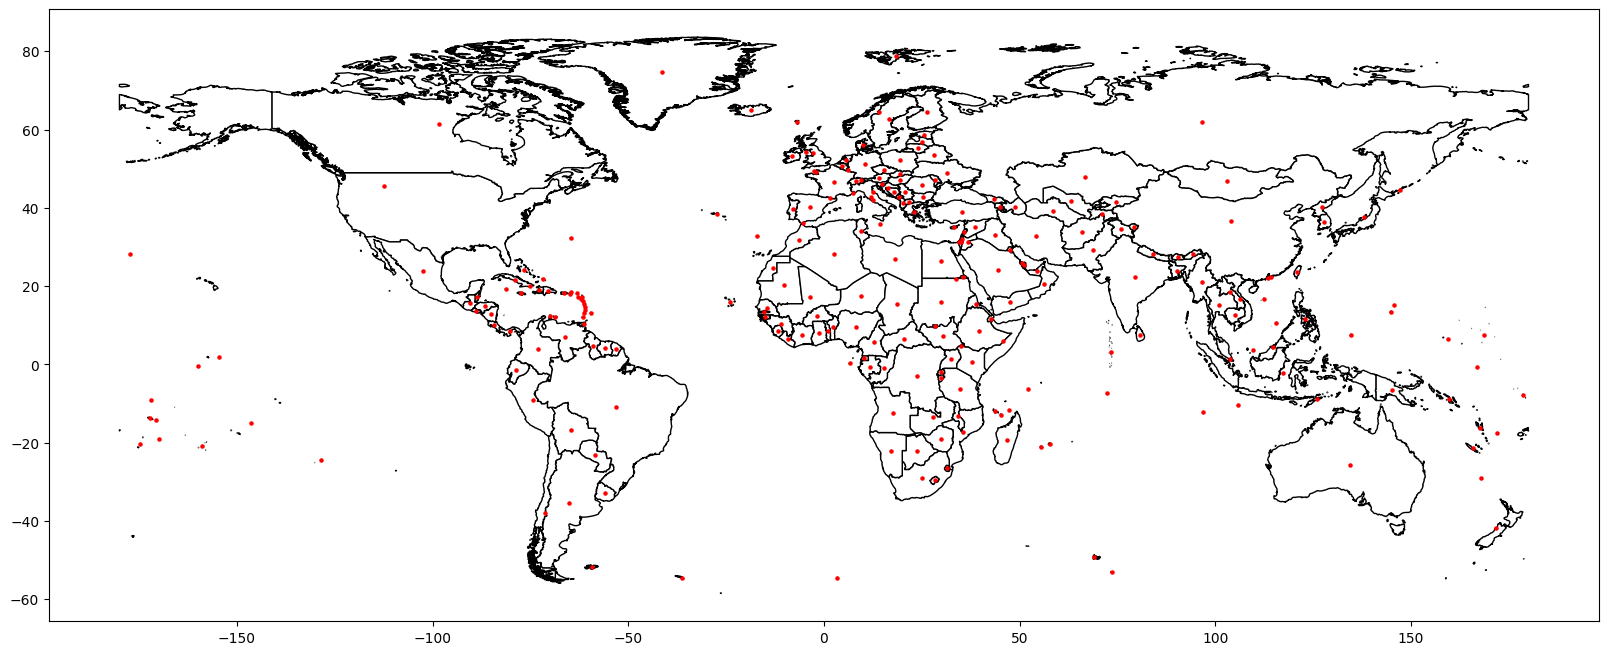

In [23]:
base = burbs.plot(color='white', edgecolor='black')  # 绘制地图基础层
burbs.centroid.plot(ax=base, marker='o', color='red', markersize=5)  # 在地图上标记点
plt.show()

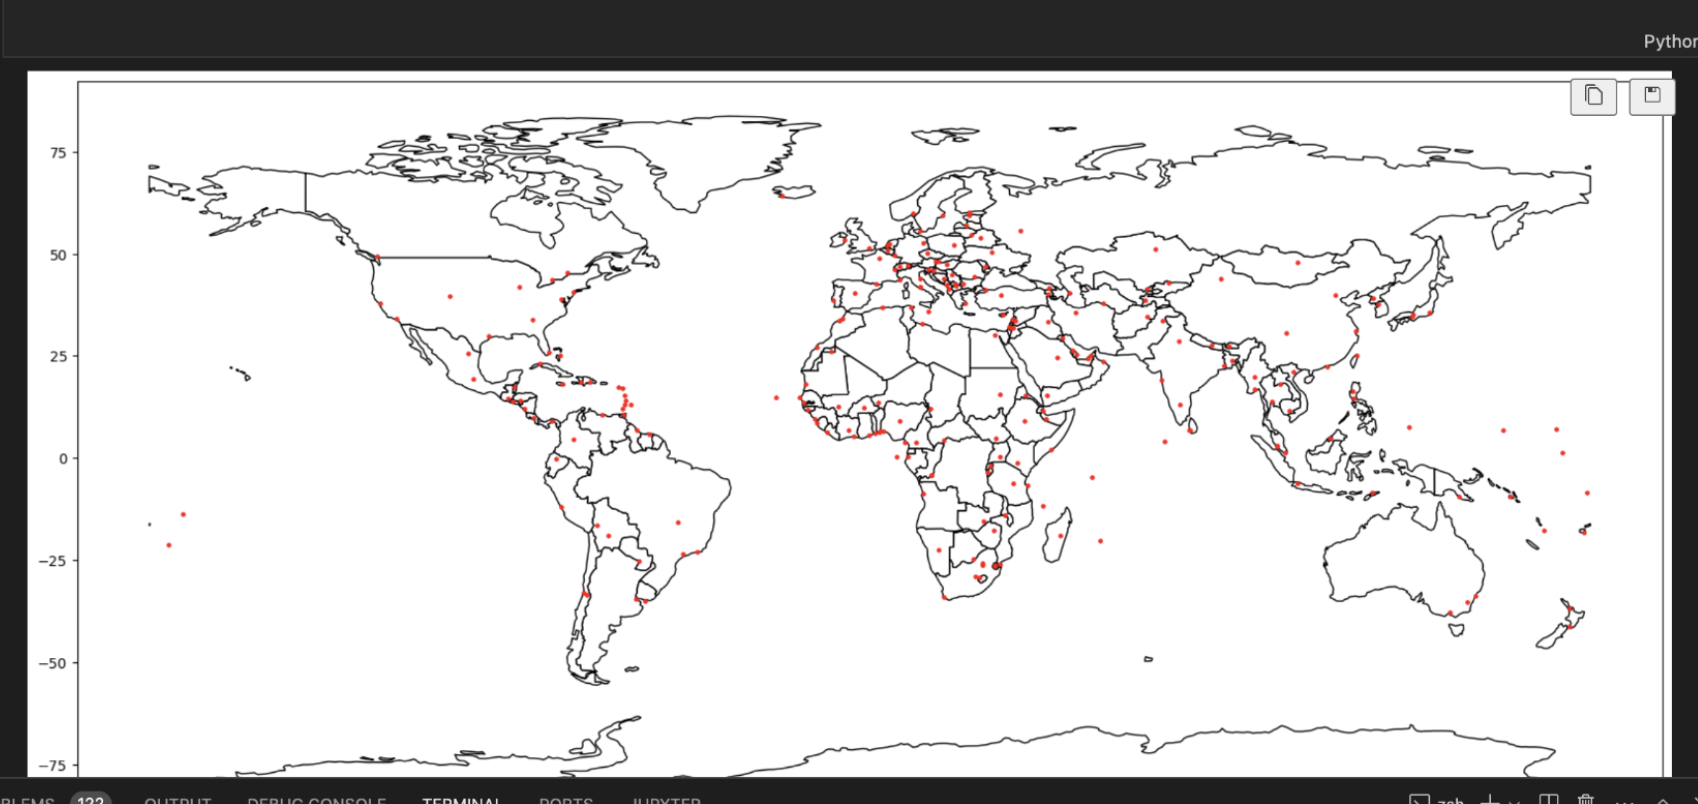

In [24]:
from IPython.display import Image
Image(filename='Screenshot 2024-08-14 at 11.19.37.png')

In [25]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [26]:
world = world.merge(mortality_data, how='left', left_on='SOVEREIGNT', right_on='Country')


In [27]:
print(mortality_data.head())

   Case #  Year       Date    Country State  \
0     254  2022  8/16/2022   GERMANY    NaN   
1     253  2022  8/15/2022       USA     CA   
2     252  2022  8/14/2022   FINLAND    NaN   
3     251  2022   8/2/2022       USA     FL   
4     250  2022  7/27/2022       USA     ME   

                             Description  Deaths Tesla driver Tesla occupant  \
0    Tesla car crashes into tree, burns        2          NaN            NaN   
1     Tesla veers into oncoming traffic        4            1              3   
2     Unlicensed driver hits pedestrian        1           -              -    
3   Man in wheelchair hit crossing road        1           -              -    
4           Tesla crashes at high speed        1            1             -    

  Other vehicle  ... TSLA+cycl / peds Model AutoPilot claimed  \
0            -   ...                2   NaN                -    
1            -   ...                4   NaN                -    
2            -   ...                1   N

In [28]:
world = world.merge(mortality_data, how='left', left_on='SOVEREIGNT', right_on='Country')
print(world.columns)  # 再次检查是否有 'Deaths' 列

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'TSLA+cycl / peds_y', 'Model_y', 'AutoPilot claimed_y',
       'Verified Tesla Autopilot Death_y', 'Source_y', 'Note_y',
       'Deceased 1_y', 'Deceased 2_y', 'Deceased 3_y', 'Deceased 4_y'],
      dtype='object', length=211)


In [29]:
print(mortality_data.columns)

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


In [30]:
print(world.head())
print(mortality_data.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

  TSLA+cycl / peds_y  Model_y AutoPilot clai

In [48]:
print(mortality_data.columns)
print(mortality_data[['Country', 'Deaths']].head())

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')
   Country  Deaths
0  Germany       2
1      USA       4
2  Finland       1
3      USA       1
4      USA       1


In [47]:
print(world[['SOVEREIGNT']].head())

                    SOVEREIGNT
0                         Fiji
1  United Republic of Tanzania
2               Western Sahara
3                       Canada
4                       Canada


In [50]:
world = world.merge(mortality_data, how='left', left_on='SOVEREIGNT', right_on='Country')
print(world.columns)  # 检查合并后的列
print(world[['SOVEREIGNT', 'Deaths']].head())

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object', length=232)
                    SOVEREIGNT  Deaths
0                         Fiji     NaN
1  United Republic of Tanzania     NaN
2               Western Sahara     NaN
3                       Canada     1.0
4                       Canada     1.0


In [51]:
print(world[['SOVEREIGNT', 'Deaths']].head())


                    SOVEREIGNT  Deaths
0                         Fiji     NaN
1  United Republic of Tanzania     NaN
2               Western Sahara     NaN
3                       Canada     1.0
4                       Canada     1.0


In [52]:
unmatched = world[world['Deaths'].isna()]
print(unmatched[['SOVEREIGNT', 'Deaths']])

                       SOVEREIGNT  Deaths
0                            Fiji     NaN
1     United Republic of Tanzania     NaN
2                  Western Sahara     NaN
219      United States of America     NaN
220                    Kazakhstan     NaN
...                           ...     ...
4299           Republic of Serbia     NaN
4300                   Montenegro     NaN
4301                       Kosovo     NaN
4302          Trinidad and Tobago     NaN
4303                  South Sudan     NaN

[155 rows x 2 columns]


In [53]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object', length=232)


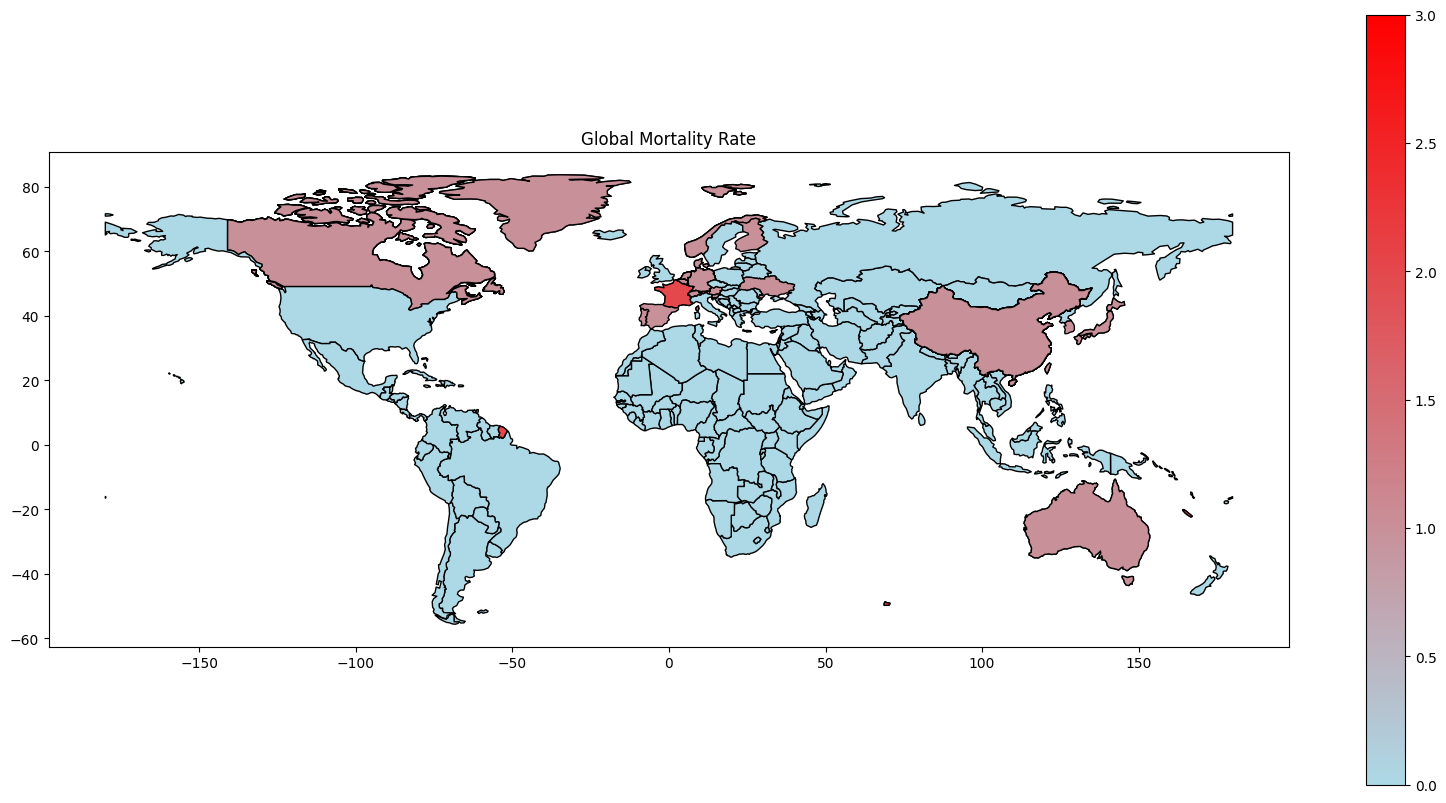

In [61]:
shapefile_path = "ne_110m_admin_0_countries.shp"
world = gp.read_file(shapefile_path)

mortality_data = pd.read_csv("Tesla_Dealth.csv")
mortality_data.columns = mortality_data.columns.str.strip()
mortality_data.Country = mortality_data.Country.str.strip()

world = world[(world.SOVEREIGNT != "Antarctica")]

world = world.merge(mortality_data, how='left', left_on='SOVEREIGNT', right_on='Country')

world['Deaths'] = world['Deaths'].fillna(0)

norm = Normalize(vmin=0, vmax=world['Deaths'].max())

colors = ["#ADD8E6", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

world.plot(column='Deaths', cmap=cmap, norm=norm, legend=True, edgecolor='black')
plt.title('Global Mortality Rate')
plt.show()


In [54]:
print(world.columns)
print(mortality_data.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object', length=232)
Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


## Why Germany?

In [59]:
penalty_data['Country'] = penalty_data['Country'].str.strip()
Germany_cases = penalty_data[penalty_data['Country'] == 'Germany']
print(Germany_cases['Description'])

0                    Tesla car crashes into tree, burns 
62               Tesla crashes into trees, flames erupt 
101     Tesla goes off road, hits a tree, and bursts ...
127                             Tesla crashes into tree 
132     Tesla veers into other lane, crashes into onc...
148     Sudden unintended acceleration kills store pa...
166                              Tesla kills pedestrian 
171              Tesla turns into oncoming motorcyclist 
179                         Tesla into oncoming traffic 
181                            Tesla kills motorcyclist 
227                               Driver died in pileup 
Name: Description, dtype: object


## 1. Transport in Germany: Highway and Lane Density

## 2. Weather: Rain and Snow

## 3. Vehicle Penetration Rate
60% of population

## 4. Traffic Culture: Speed!!!

